## Observations and Insights 

In [111]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
trial_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

trial_data_complete.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2


In [112]:
# Checking the number of mice in the DataFrame.
total_mice = len(trial_data_complete["Mouse ID"].unique())
total_rows = len(trial_data_complete["Mouse ID"])

print(total_mice)
print(total_rows)

249
1893


In [113]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

ids = trial_data_complete["Mouse ID"]
duplicates = trial_data_complete[trial_data_complete.duplicated(keep=False)]

In [114]:
# Optional: Get all the data for the duplicate mouse ID. 

# print the columns of duplicate mouse
print(duplicates)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
908                45.0                 0  
909                45.0                 0  


In [115]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = trial_data_complete.drop(trial_data_complete.index[[908,909]])

In [116]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean = len(clean_data["Mouse ID"].unique())
total_rows_clean = len(clean_data["Mouse ID"])

print(total_mice_clean)
print(total_rows_clean)


249
1891


## Summary Statistics

In [117]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.


clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)' : ['sum', 'median', 'std', 'sem']})


Tumor Volume (mm3)                               
                            sum     median       std       sem
Drug Regimen                                                  
Capomulin           9355.420462  41.557809  4.994774  0.329346
Ceftamin            9361.228582  51.776157  6.268188  0.469821
Infubinol           9413.493529  51.820584  6.567243  0.492236
Ketapril           10384.299876  53.698743  8.279709  0.603860
Naftisol           10105.671026  52.509285  8.134708  0.596466
Placebo             9780.078122  52.288934  7.821003  0.581331
Propriva            8333.930878  50.965298  6.496144  0.515178
Ramicane            9169.417875  40.673236  4.846308  0.320955
Stelasyn            9816.199991  52.431737  7.710419  0.573111
Zoniferol           9689.044192  51.818479  6.966589  0.516398

In [118]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

treatments = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol",]

# group studies by their Regimen
grouped_studies_df = clean_data.groupby(["Drug Regimen"])

# create summary statistics for the grouped studies
avg_volume_per_study = grouped_studies_df["Tumor Volume (mm3)"].mean()
med_volume_per_study = grouped_studies_df["Tumor Volume (mm3)"].median()
std_volume_per_study = grouped_studies_df["Tumor Volume (mm3)"].std()
sem_volume_per_study = grouped_studies_df["Tumor Volume (mm3)"].sem()

# create data summary
statistics_summary_df = pd.DataFrame({"Mean Tumor Volume (mm3)": avg_volume_per_study,
                                  "Median Tumor Volume (mm3)": med_volume_per_study,
                                  "Standard Deviation Tumor Volume (mm3)": std_volume_per_study,
                                  "SEM Tumor Volume (mm3)": sem_volume_per_study,})
# create and print dataframe
statistics_summary_df.head(100, )



,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.414660,50.965298,6.496144,0.515178
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


## Bar Plots

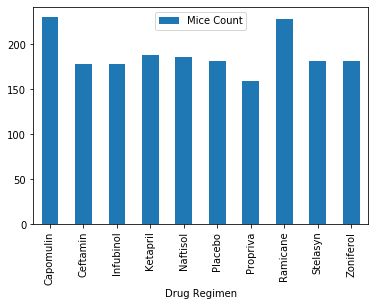

In [119]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

# create a list of the treatments
treatments = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol",]

# create a measure for the number of mice per study and build a dframe
mice_per = grouped_studies_df["Mouse ID"].count()
mice_count_df = pd.DataFrame({"Number of mice": mice_per,})

# plot the mice across treatments on a bar chart
x_axis = np.arange(len(treatments))
mice_count = mice_count_df["Number of mice"]
mice_count_group = mice_count_df.groupby("Drug Regimen")


# create data summary
df = pd.DataFrame({"Treatments": treatments,
                                  "Mice Count": mice_count,})

ax = df.plot.bar()

Text(0, 0.5, 'Number of Mice')

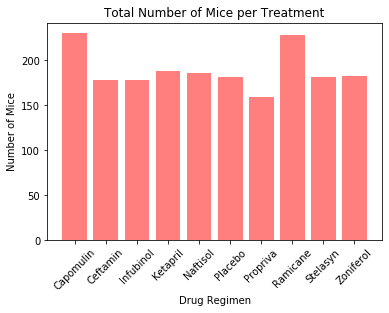

In [120]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

treatments = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol",]

# group studies by mouse
mice_per = grouped_studies_df["Mouse ID"].count()
mice_count_df = pd.DataFrame({"Number of mice": mice_per,})

# create a count of the mice and add the treatments to break the mice down
mice_count = mice_count_df["Number of mice"]
x_axis = np.arange(len(treatments))

# plot the treatments as x and mice count as y
plt.bar(x_axis, mice_count, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(rotation=45)
plt.xticks(tick_locations, treatments)

# add title and axis labels
plt.title("Total Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

## Pie Plots

Text(0, 0.5, 'Number of mice per gender')

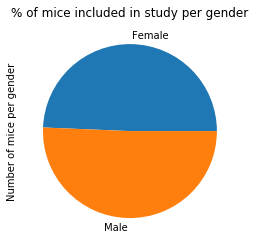

In [121]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

unique_mice_df = clean_data.groupby(["Mouse ID"])



# Find out how many of each gender took bike trips
gender_studies = gender_groups['Mouse ID'].count()
gender_groups = clean_data.groupby(["Sex"])


# list of available genders
gender_list = ["Male", "Female"]

# Create a pie chart based upon the trip duration of that single bike
study_pie = gender_studies.plot(kind="pie", y=gender_list, title=("% of mice included in study per gender"))
study_pie.set_ylabel("Number of mice per gender")
study_pie.set_ylabel("Number of mice per gender")

C:\Users\rgarskovas\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


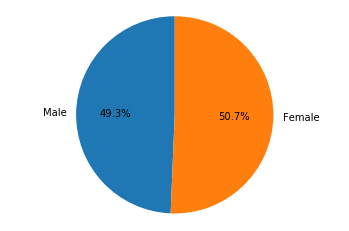

In [122]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = gender_list
sizes = [gender_studies]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


## Quartiles, Outliers and Boxplots

In [128]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# filter for the four most promising treatment areas
Capomulin_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin", :]
Ceftamin_df = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin", :]
Infubinol_df = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol", :]
Ketapril_df = clean_data.loc[clean_data["Drug Regimen"] == "Ketapril", :]

# find the last timepoint for each of the promising treatment areas
final_tumor_volume_Capomulin = Capomulin_df.sort_values("Timepoint").drop_duplicates(['Drug Regimen'], keep='last')
final_tumor_volume_Ceftamin = Ceftamin_df.sort_values("Timepoint").drop_duplicates(['Drug Regimen'], keep='last')
final_tumor_volume_Infubinol = Infubinol_df.sort_values("Timepoint").drop_duplicates(['Drug Regimen'], keep='last')
final_tumor_volume_Ketapril = Ketapril_df.sort_values("Timepoint").drop_duplicates(['Drug Regimen'], keep='last')

# take the value for each of the last time points
final_tumor_volume_Capomulin_mm3 = final_tumor_volume_Capomulin.iloc[0]['Tumor Volume (mm3)']
final_tumor_volume_Ceftamin_mm3 = final_tumor_volume_Ceftamin.iloc[0]['Tumor Volume (mm3)']
final_tumor_volume_Infubinol_mm3 = final_tumor_volume_Infubinol.iloc[0]['Tumor Volume (mm3)']
final_tumor_volume_Ketapril_mm3 = final_tumor_volume_Ketapril.iloc[0]['Tumor Volume (mm3)']

# print the final tumor volumes for each of the promising treatment areas
print(f"The final tumor volume for Capomulin is: {final_tumor_volume_Capomulin_mm3}")
print(f"The final tumor volume for Ceftamin is: {final_tumor_volume_Ceftamin_mm3}")
print(f"The final tumor volume for Infubinol is: {final_tumor_volume_Infubinol_mm3}")
print(f"The final tumor volume for Ketapril is: {final_tumor_volume_Ketapril_mm3}")


# Find quartile calculations
quartiles = total_volume_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Print quartiles
print(f"The lower quartile of volumes is: {lowerq}")
print(f"The upper quartile of volumes is: {upperq}")
print(f"The interquartile range of volumes is: {iqr}")
print(f"The the median of volumes is: {quartiles[0.5]} ")

# find and print the lower bounds for outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The final tumor volume for Capomulin is: 37.07402422
The final tumor volume for Ceftamin is: 64.72983655
The final tumor volume for Infubinol is: 62.75445141
The final tumor volume for Ketapril is: 62.90944062
The lower quartile of volumes is: 45.0
The upper quartile of volumes is: 56.30563288
The interquartile range of volumes is: 11.305632879999997
The the median of volumes is: 48.95791906 
Values below 28.041550680000004 could be outliers.
Values above 73.26408219999999 could be outliers.


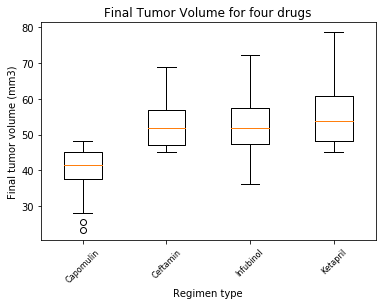

In [124]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# make a list of sampled regimines
sampled_regimens = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril']

# create a list for the sampled regimines and their volumes
tumor_volumes = [Capomulin_df["Tumor Volume (mm3)"], Ceftamin_df["Tumor Volume (mm3)"], Infubinol_df["Tumor Volume (mm3)"],Ketapril_df["Tumor Volume (mm3)"]]

# create the subplot with titles
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for four drugs')
ax1.set_xlabel('Regimen type')
ax1.set_ylabel('Final tumor volume (mm3)')

# print labels
ax1.set_xticklabels(np.repeat(sampled_regimens, 1),
                    rotation=45, fontsize=8)

# create box plot from the subplot
ax1.boxplot(tumor_volumes)
plt.show()


## Line and Scatter Plots

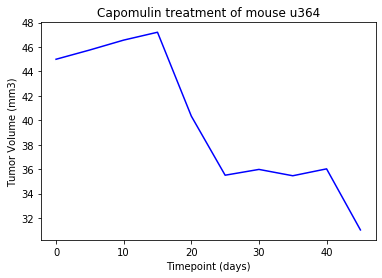

In [129]:

#Filter for Capomulin only
Capomulin_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin", :]

#Filter for specific mouse
Capomulin_Mouse_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "u364", :]

# List of tumor volumes and timepoints
Tumor_per_Capomulin_mouse = Capomulin_Mouse_df["Tumor Volume (mm3)"]
Timepoint = Capomulin_Mouse_df["Timepoint"]

# print the time point as x axis and volume as y with labels
tumor_time_capomulin, = plt.plot(Timepoint, Tumor_per_Capomulin_mouse, color="blue" )
plt.title("Capomulin treatment of mouse u364")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")


# Show the chart
plt.show()

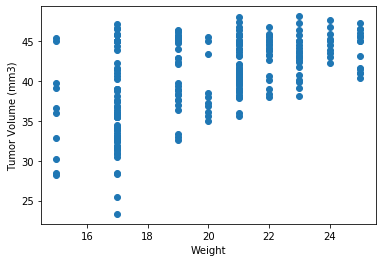

In [130]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# create an x axis of weight and a y axis of tumor volume
x_values = Capomulin_df['Weight (g)']
y_values = Capomulin_df['Tumor Volume (mm3)']

# plot the values on a scatter plot with labels
plt.scatter(x_values,y_values)
plt.xlabel('Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

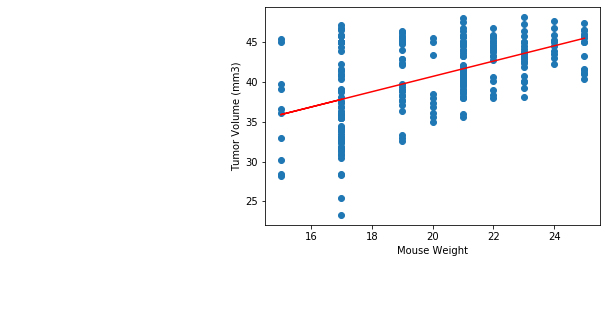

The r-squared is: 0.2763600223455911


In [131]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# use the x and y values from the Capomulin scatter and create a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot the scatter plot and the regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

# find the r squared volume and print
print(f"The r-squared is: {rvalue**2}")
plt.show()